In [36]:
import requests as req
import json
import pandas as pd
import datetime
from matplotlib.finance import candlestick2_ohlc
import matplotlib.pyplot as plt

In [37]:
# Using CoinAPI

#url = 'https://rest.coinapi.io/v1/quotes/COINBASE_SPOT_BTC_USD/history?time_start=2016-01-01T00:00:00'
#header = {'X-CoinAPI-Key':'A0D75BBF-50C6-4DE5-A0D0-7A9EB34386D4'}
#resp = req.get(url,headers=header)
#data = resp.json()

In [38]:
# Using CryptoCompare
base_url = 'https://min-api.cryptocompare.com/data/histoday?'

# Number of points to graph
num_points = 200

# Number of days to average together (so here it averages over three days)
aggregate = 3

# Crypto code
cc = 'BTC'
url = '%sfsym=%s&tsym=USD&limit=%s&aggregate=%s&e=CCCAGG'%(base_url,cc,str(num_points),str(aggregate))
resp = req.get(url)
data = resp.json()

In [39]:
data['Data'][0]

{'close': 670.38,
 'high': 680.94,
 'low': 655.72,
 'open': 664.2,
 'time': 1468627200,
 'volumefrom': 109802.37,
 'volumeto': 73983011.96}

In [40]:
data_df = pd.DataFrame(columns=['Date','High','Low','Open','Close'])
for i in range(len(data['Data'])):
    date = datetime.datetime.fromtimestamp(int(data['Data'][i]['time'])).strftime('%Y-%m-%d')
    data_df.set_value(index=i,col='Date',value=date)
    data_df.set_value(index=i,col='High',value=data['Data'][i]['high'])
    data_df.set_value(index=i,col='Low',value=data['Data'][i]['low'])
    data_df.set_value(index=i,col='Open',value=data['Data'][i]['open'])
    data_df.set_value(index=i,col='Close',value=data['Data'][i]['close'])
data_df.head()

,Date,High,Low,Open,Close
0,2016-07-15,680.94,655.72,664.2,670.38
1,2016-07-18,673.24,657.82,670.38,664.62
2,2016-07-21,669.44,645.69,664.62,659.29
3,2016-07-24,662.51,643.49,659.29,654.54
4,2016-07-27,657.96,650.81,654.54,654.74


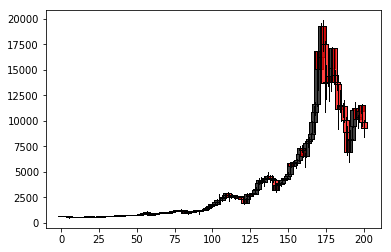

In [41]:
fig, ax = plt.subplots()
candlestick2_ohlc(ax,data_df['Open'],data_df['High'],data_df['Low'],data_df['Close'])
plt.show()